In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats




In [2]:
train_lr_1 = pd.read_csv('trainLR1.csv')
test_lr_1 = pd.read_csv('testLR1.csv')

In [3]:
train_lr_1.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [4]:
train_lr_1.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [5]:
train_lr_1

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [6]:
train_lr_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [7]:
train_lr_1.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

<Axes: >

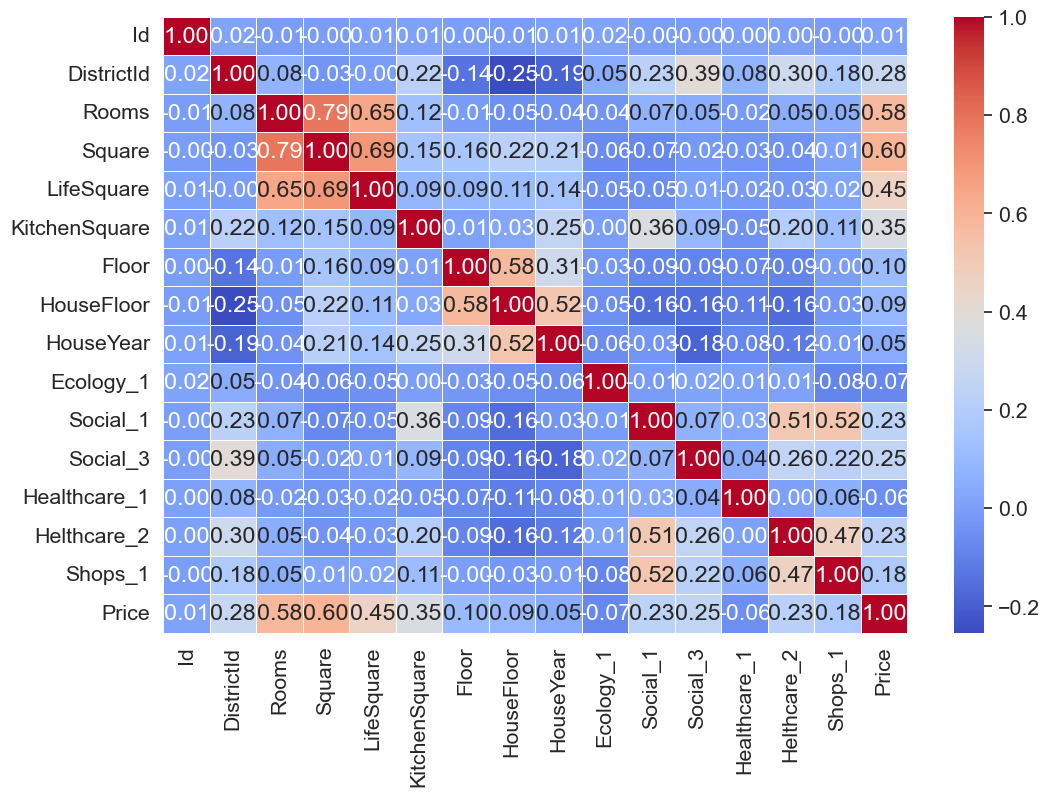

In [40]:
numerical_cols = train_lr_1.select_dtypes(include=['float64', 'int64'])

# Вычисляем корреляционную матрицу для числовых признаков
corr_matrix = numerical_cols.corr()

# Настроим размерность графика
plt.figure(figsize=(12, 8))

# Строим тепловую карту (heatmap) корреляционной матрицы
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar=True)




In [9]:
train_lr_1 = train_lr_1.drop(columns=['Social_2'])

In [10]:
train_lr_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Price  

In [11]:
train_lr_1['LifeSquare'] = train_lr_1['LifeSquare'].fillna(train_lr_1['LifeSquare'].median())
train_lr_1['Healthcare_1'] = train_lr_1['Healthcare_1'].fillna(train_lr_1['Healthcare_1'].median())

In [12]:
train_lr_1

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,B,B,11,0,900.0,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,B,B,1,0,900.0,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,2,900.0,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,6,900.0,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,1,900.0,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,14,900.0,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,3,125.0,3,5,B,171842.411855


In [13]:
train_lr_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   10000 non-null  float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Price  

In [14]:
train_lr_1

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,B,B,11,0,900.0,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,B,B,1,0,900.0,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,2,900.0,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,6,900.0,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,1,900.0,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,14,900.0,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,3,125.0,3,5,B,171842.411855


In [15]:
rows_to_drop = train_lr_1[(train_lr_1['LifeSquare'] > train_lr_1['Square']) | 
                          (train_lr_1['KitchenSquare'] > train_lr_1['Square'])].index

# Подсчитываем количество таких строк
count_to_drop = len(rows_to_drop)

# Удаляем эти строки из DataFrame на месте
train_lr_1.drop(index=rows_to_drop, inplace=True)

# Выводим количество удалённых строк
print(f'Количество удалённых строк: {count_to_drop}')
train_lr_1.isna().sum()

Количество удалённых строк: 525


Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [16]:
train_lr_1

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,B,B,11,0,900.0,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,B,B,1,0,900.0,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,2,900.0,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,6,900.0,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,1,900.0,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,14,900.0,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,3,125.0,3,5,B,171842.411855


In [17]:
rows_to_drop = train_lr_1[(train_lr_1['Floor'] > train_lr_1['HouseFloor'])].index

# Подсчитываем количество таких строк
count_to_drop = len(rows_to_drop)

# Удаляем эти строки из DataFrame на месте
train_lr_1.drop(index=rows_to_drop, inplace=True)

# Выводим количество удалённых строк
print(f'Количество удалённых строк: {count_to_drop}')

Количество удалённых строк: 1686


In [18]:
train_lr_1.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [19]:
train_lr_1

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,B,B,11,0,900.0,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,B,B,1,0,900.0,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,2,900.0,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,4356,9,1.0,43.303458,21.519087,8.0,12,14.0,1992,0.161532,B,B,25,1,30.0,2,4,B,136744.340827
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,6,900.0,1,9,B,119367.455796
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,14,900.0,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,3,125.0,3,5,B,171842.411855


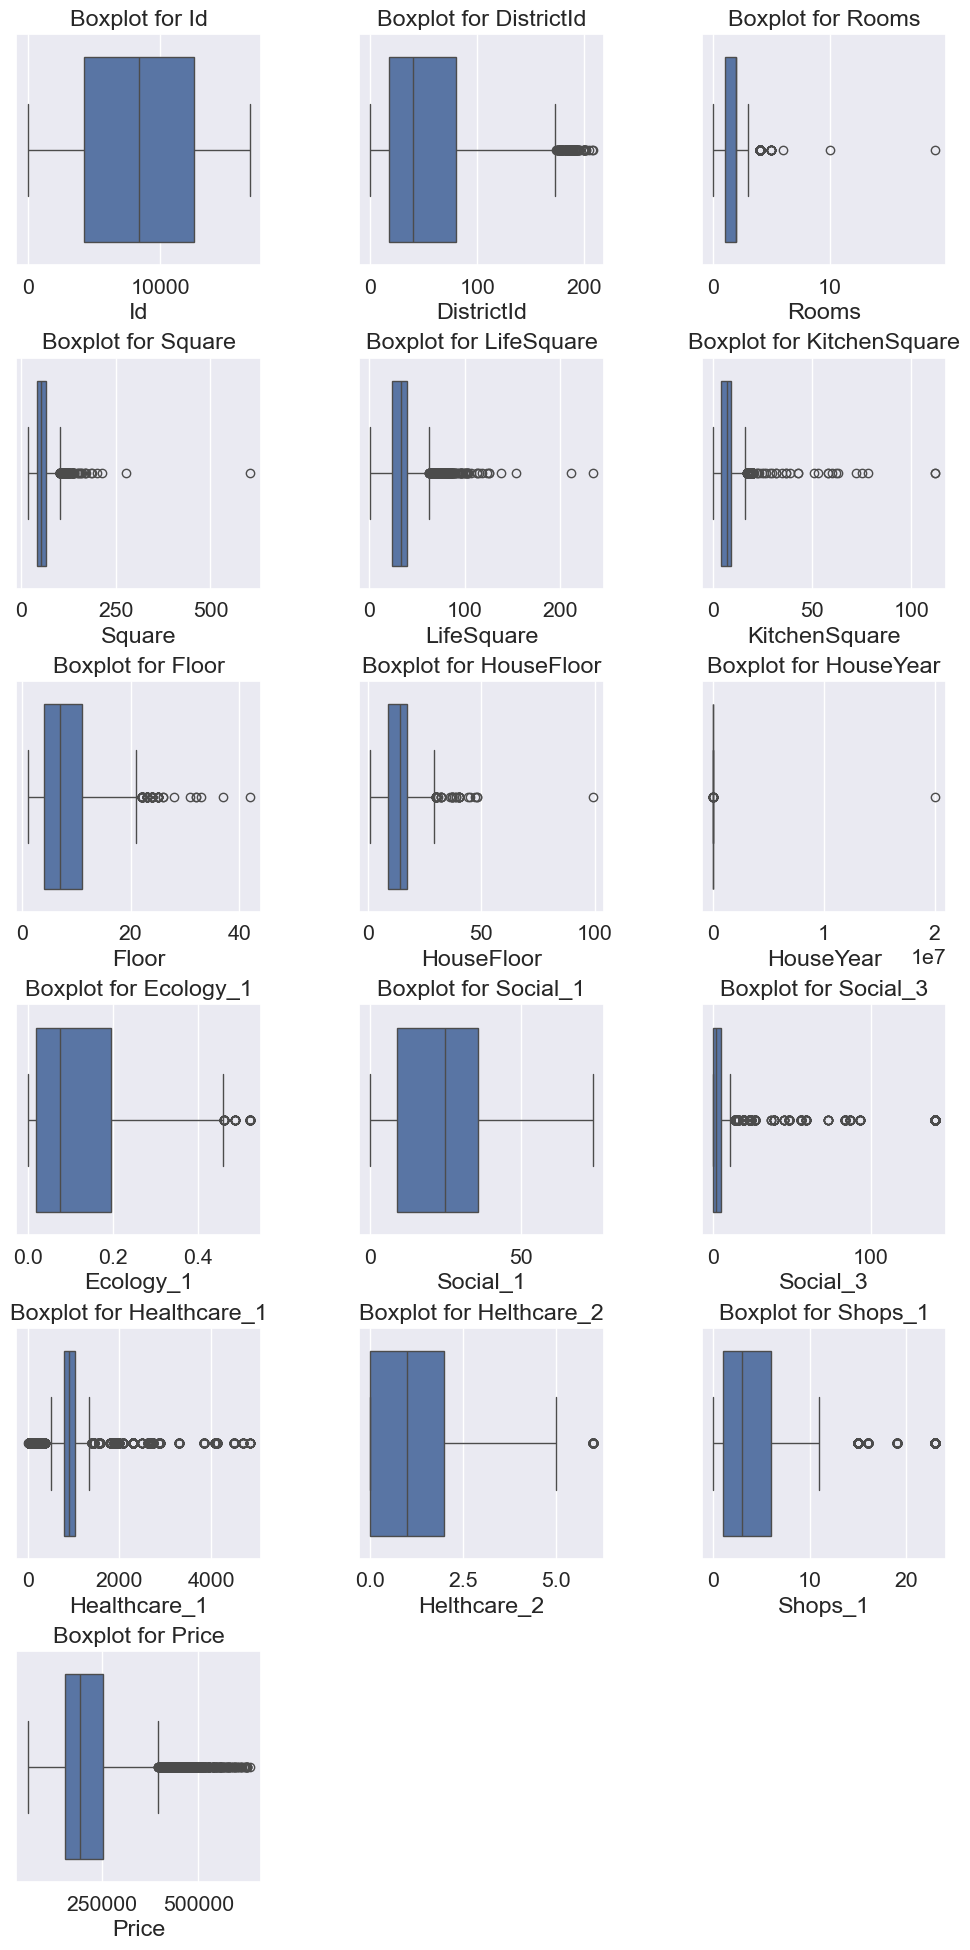

In [20]:
numeric_columns = train_lr_1.select_dtypes(include=['float64', 'int64']).columns

# Определим размеры сетки для подграфиков
n_cols = 3  # Количество столбцов в сетке
n_rows = (len(numeric_columns) // n_cols) + (len(numeric_columns) % n_cols > 0)  # Количество строк

# Настройка графиков
plt.figure(figsize=(12, 4 * n_rows))  # Увеличиваем высоту в зависимости от количества строк

for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Создаем подграфики с правильным количеством строк и столбцов
    sns.boxplot(x=train_lr_1[col])
    plt.title(f'Boxplot for {col}')

# Увеличиваем расстояние между графиками
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

In [21]:


train_lr_1['Rooms'] = train_lr_1['Rooms'].where(train_lr_1['Rooms'] < 5, train_lr_1['Rooms'].mode()[0])

train_lr_1['Square'] = train_lr_1['Square'].where(train_lr_1['Square'] < 150, train_lr_1['Square'].median())

train_lr_1['LifeSquare'] = train_lr_1['LifeSquare'].where(train_lr_1['LifeSquare'] < 100, train_lr_1['LifeSquare'].median())

train_lr_1['KitchenSquare'] = train_lr_1['KitchenSquare'].where(train_lr_1['KitchenSquare'] <= 50, train_lr_1['KitchenSquare'].median())

train_lr_1['Floor'] = train_lr_1['Floor'].where(train_lr_1['Floor'] < 30, train_lr_1['Floor'].mode()[0])

train_lr_1['HouseFloor'] = train_lr_1['HouseFloor'].where(train_lr_1['HouseFloor'] < 50, train_lr_1['HouseFloor'].mode()[0])

train_lr_1['HouseYear'] = train_lr_1['HouseYear'].where(train_lr_1['HouseYear'] < 2500, train_lr_1['HouseYear'].mode()[0])

# Заменяем значения, где 'HouseYear' < 1930 на моду
train_lr_1['HouseYear'] = train_lr_1['HouseYear'].where(train_lr_1['HouseYear'] >= 1930, train_lr_1['HouseYear'].mode()[0])


train_lr_1['Social_3'] = train_lr_1['Social_3'].where(train_lr_1['Social_3'] <= 100, train_lr_1['Social_3'].median())

train_lr_1['Healthcare_1'] = train_lr_1['Healthcare_1'].where(train_lr_1['Healthcare_1'] < 1600, train_lr_1['Healthcare_1'].median())

In [22]:
train_lr_1.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [23]:
train_lr_1

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,B,B,11,0,900.0,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,B,B,1,0,900.0,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,2,900.0,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,4356,9,1.0,43.303458,21.519087,8.0,12,14.0,1992,0.161532,B,B,25,1,30.0,2,4,B,136744.340827
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,6,900.0,1,9,B,119367.455796
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,14,900.0,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,3,125.0,3,5,B,171842.411855


<Axes: xlabel='Price'>

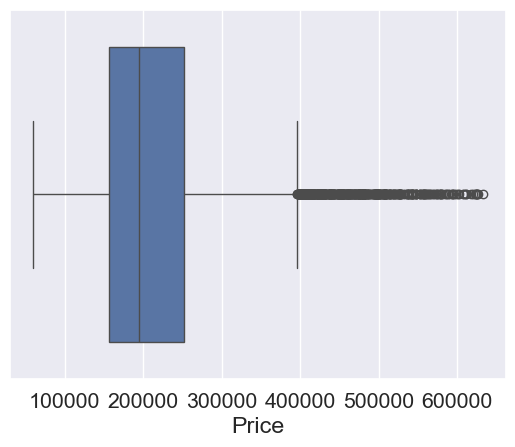

In [24]:
sns.boxplot(x=train_lr_1['Price'])

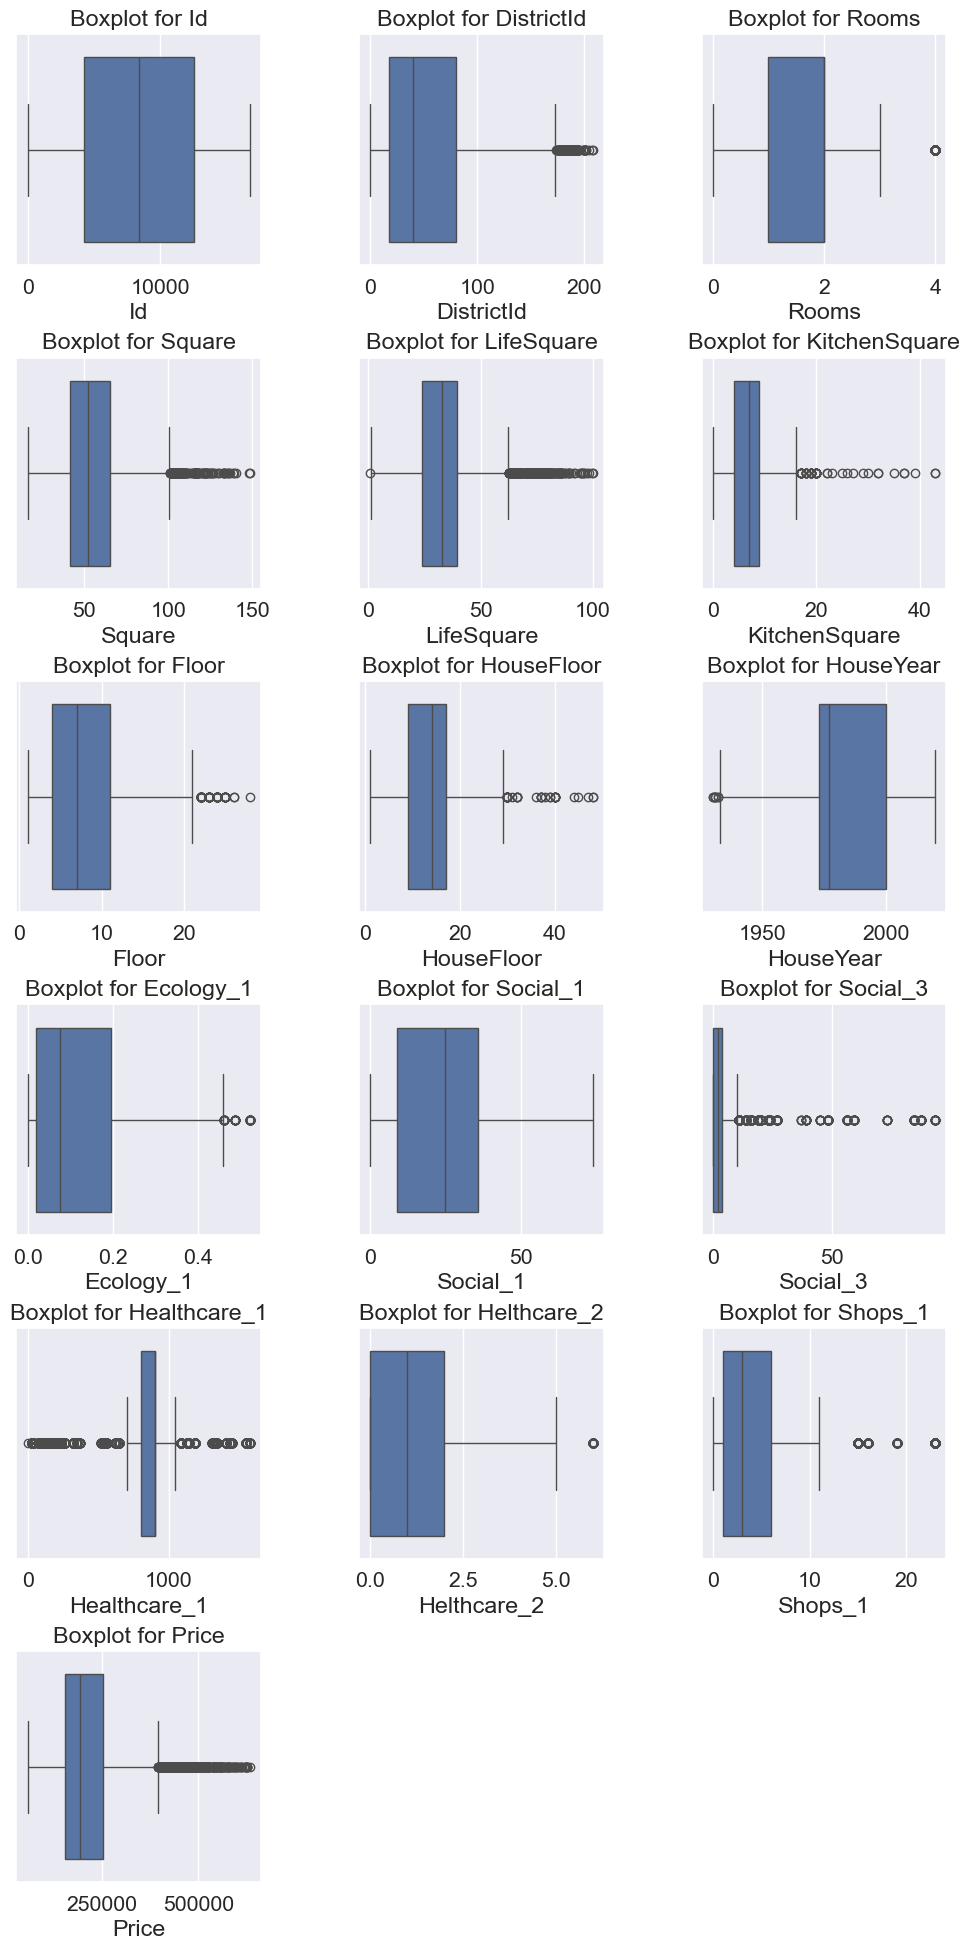

In [25]:
n_cols = 3  # Количество столбцов в сетке
n_rows = (len(numeric_columns) // n_cols) + (len(numeric_columns) % n_cols > 0)  # Количество строк

# Настройка графиков
plt.figure(figsize=(12, 4 * n_rows))  # Увеличиваем высоту в зависимости от количества строк

for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Создаем подграфики с правильным количеством строк и столбцов
    sns.boxplot(x=train_lr_1[col])
    plt.title(f'Boxplot for {col}')

# Увеличиваем расстояние между графиками
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

In [26]:
train_lr_1.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [27]:
train_lr_1

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,B,B,11,0,900.0,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,B,B,1,0,900.0,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,2,900.0,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,4356,9,1.0,43.303458,21.519087,8.0,12,14.0,1992,0.161532,B,B,25,1,30.0,2,4,B,136744.340827
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,6,900.0,1,9,B,119367.455796
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,14,900.0,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,3,125.0,3,5,B,171842.411855


In [28]:
cat_features = ['Ecology_2', 'Ecology_3', 'Shops_2']


In [29]:
train_lr_1 = pd.get_dummies(train_lr_1, columns=cat_features, drop_first=True)

In [30]:
train_lr_1.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Price            0
Ecology_2_B      0
Ecology_3_B      0
Shops_2_B        0
dtype: int64

In [31]:
train_lr_1

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_B,Ecology_3_B,Shops_2_B
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,11,0,900.0,0,0,305018.871089,True,True,True
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,1,1183.0,1,0,177734.553407,True,True,True
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,0,240.0,3,1,282078.720850,True,True,True
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,1,0,900.0,0,1,168106.007630,True,True,True
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,2,900.0,0,6,343995.102962,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,4356,9,1.0,43.303458,21.519087,8.0,12,14.0,1992,0.161532,25,1,30.0,2,4,136744.340827,True,True,True
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,52,6,900.0,1,9,119367.455796,True,True,True
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,20,14,900.0,1,5,165953.912580,True,True,True
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,47,3,125.0,3,5,171842.411855,True,True,True


In [32]:
# # Инициализация стандартизатора
# scaler = StandardScaler()

# # Масштабирование числовых данных
# train_lr_1[numeric_columns] = scaler.fit_transform(train_lr_1[numeric_columns])

In [33]:
train_lr_1.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Price            0
Ecology_2_B      0
Ecology_3_B      0
Shops_2_B        0
dtype: int64

In [34]:
train_lr_1.to_csv('train_lr_1_processed.csv', index=False)

In [35]:
def prepare_data(df):
    df = df.drop(columns=['Social_2'])
    df['LifeSquare'] = df['LifeSquare'].fillna(df['LifeSquare'].median())
    df['Healthcare_1'] = df['Healthcare_1'].fillna(df['Healthcare_1'].median())
    
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    df['Rooms'] = df['Rooms'].where(df['Rooms'] < 5, df['Rooms'].mode()[0])

    df['Square'] = df['Square'].where(df['Square'] < 150, df['Square'].median())
    
    df['LifeSquare'] = df['LifeSquare'].where(df['LifeSquare'] < 100, df['LifeSquare'].median())
    
    df['KitchenSquare'] = df['KitchenSquare'].where(df['KitchenSquare'] <= 50, df['KitchenSquare'].median())
    
    df['Floor'] = df['Floor'].where(df['Floor'] < 30, df['Floor'].mode()[0])
    
    df['HouseFloor'] = df['HouseFloor'].where(df['HouseFloor'] < 50, df['HouseFloor'].mode()[0])
    
    df['HouseYear'] = df['HouseYear'].where(df['HouseYear'] < 2500, df['HouseYear'].mode()[0])

    # Заменяем значения, где 'HouseYear' < 1930 на моду
    df['HouseYear'] = df['HouseYear'].where(df['HouseYear'] >= 1930, df['HouseYear'].mode()[0])

    
    df['Social_3'] = df['Social_3'].where(df['Social_3'] <= 100, df['Social_3'].median())
    
    df['Healthcare_1'] = df['Healthcare_1'].where(df['Healthcare_1'] < 1600, df['Healthcare_1'].median())
    
    cat_features = ['Ecology_2', 'Ecology_3', 'Shops_2']
    df = pd.get_dummies(df, columns=cat_features, drop_first=True)
    # scaler = StandardScaler()
    # df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df

<Axes: >

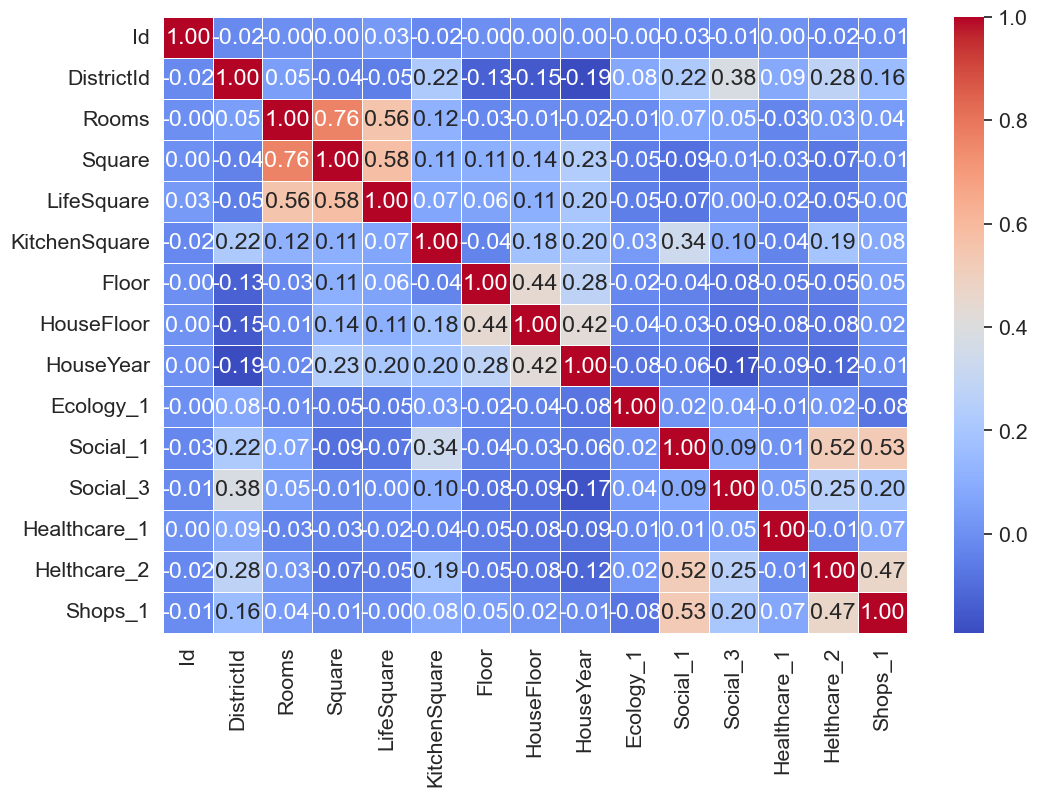

In [42]:
numerical_cols = test_lr_1.select_dtypes(include=['float64', 'int64'])

# Вычисляем корреляционную матрицу для числовых признаков
corr_matrix = numerical_cols.corr()

# Настроим размерность графика
plt.figure(figsize=(12, 8))

# Строим тепловую карту (heatmap) корреляционной матрицы
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar=True)



In [37]:
test_lr_1 = prepare_data(test_lr_1)

<Axes: >

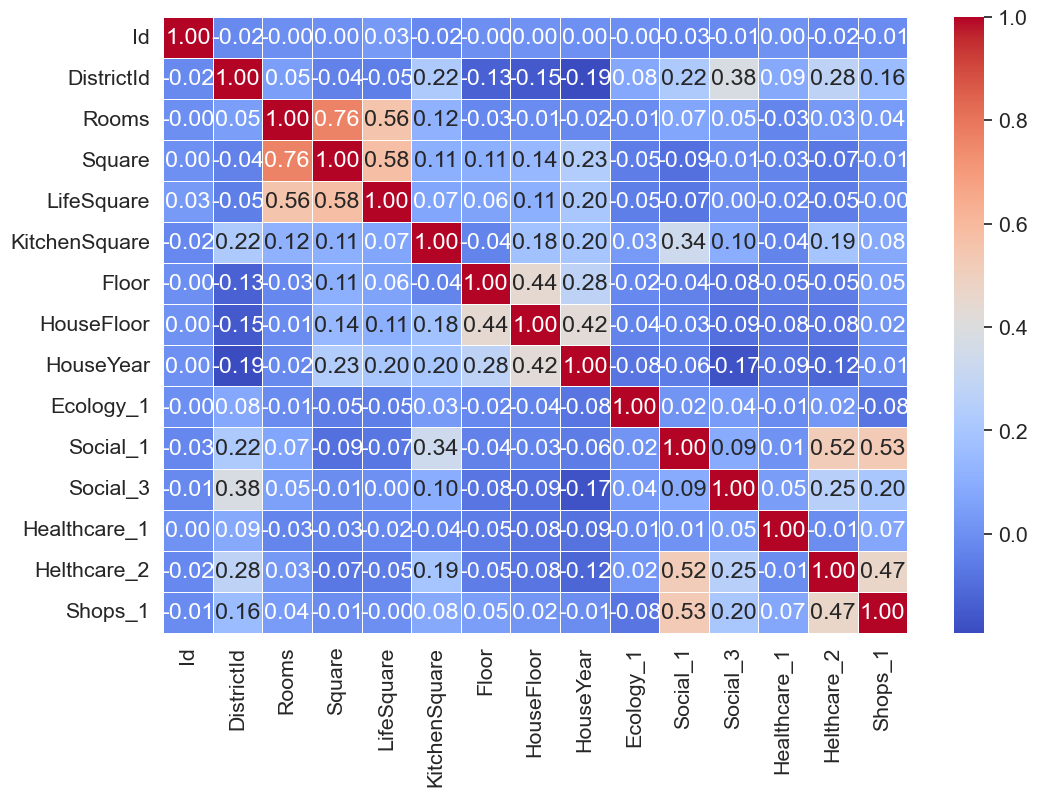

In [43]:
numerical_cols = test_lr_1.select_dtypes(include=['float64', 'int64'])

# Вычисляем корреляционную матрицу для числовых признаков
corr_matrix = numerical_cols.corr()

# Настроим размерность графика
plt.figure(figsize=(12, 8))

# Строим тепловую карту (heatmap) корреляционной матрицы
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar=True)



In [39]:
test_lr_1.to_csv('test_lr_1_processed.csv', index=False)